In [1]:
"""
Classification of Stars and Galaxies with Machine Learning
Jupyter Notebook designed by Matthew Pooser
( mpooser@uga.edu )
CS@UGA, Fall 2019
Under the direction of Dr. Sheng Li
"""

Using TensorFlow backend.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('SDSS_DR12.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237663228535374206,300.841762,76.511282,19.19619,17.83329,17.52225,17.40237,17.35182,4134,301,1,106,1869067566828251136,STAR,-0.000220,1660,53230,268
1,1237663228535374382,300.730508,76.551731,21.65541,19.13715,17.92577,17.44741,17.15818,4134,301,1,106,1869069216095692800,STAR,-0.000008,1660,53230,274
2,1237663228535374435,300.871382,76.530570,20.70867,19.20954,18.55966,18.24395,18.10117,4134,301,1,106,1869067291950344192,STAR,0.000096,1660,53230,267
3,1237663228535374802,300.317409,76.374746,22.88806,21.20900,19.90560,19.33555,19.08966,4134,301,1,106,1870200338850539520,STAR,-0.000247,1661,53240,293
4,1237663228535439577,301.252332,76.319520,17.82932,16.11081,15.39808,15.13612,15.00507,4134,301,1,107,1869072789508483072,STAR,-0.000131,1660,53230,287


In [3]:
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'mjd', 'fiberid'], axis=1, inplace=True)
data.head()

,ra,dec,u,g,r,i,z,class,redshift
0,300.841762,76.511282,19.19619,17.83329,17.52225,17.40237,17.35182,STAR,-0.000220
1,300.730508,76.551731,21.65541,19.13715,17.92577,17.44741,17.15818,STAR,-0.000008
2,300.871382,76.530570,20.70867,19.20954,18.55966,18.24395,18.10117,STAR,0.000096
3,300.317409,76.374746,22.88806,21.20900,19.90560,19.33555,19.08966,STAR,-0.000247
4,301.252332,76.319520,17.82932,16.11081,15.39808,15.13612,15.00507,STAR,-0.000131


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108070 entries, 0 to 108069
Data columns (total 9 columns):
ra          108070 non-null float64
dec         108070 non-null float64
u           108070 non-null float64
g           108070 non-null float64
r           108070 non-null float64
i           108070 non-null float64
z           108070 non-null float64
class       108070 non-null object
redshift    108070 non-null float64
dtypes: float64(8), object(1)
memory usage: 7.4+ MB


In [5]:
y = data['class'].values
data = data[data['class'] != "QSO"]
data

,ra,dec,u,g,r,i,z,class,redshift
0,300.841762,76.511282,19.19619,17.83329,17.52225,17.40237,17.35182,STAR,-0.000220
1,300.730508,76.551731,21.65541,19.13715,17.92577,17.44741,17.15818,STAR,-0.000008
2,300.871382,76.530570,20.70867,19.20954,18.55966,18.24395,18.10117,STAR,0.000096
3,300.317409,76.374746,22.88806,21.20900,19.90560,19.33555,19.08966,STAR,-0.000247
4,301.252332,76.319520,17.82932,16.11081,15.39808,15.13612,15.00507,STAR,-0.000131
5,301.458518,76.426766,14.23474,14.45194,14.75188,14.99473,15.24296,STAR,-0.000288
6,300.848872,76.320462,21.69935,19.60817,18.18657,17.04788,16.44566,STAR,-0.000267
7,301.319371,76.354273,25.33987,22.16937,20.70235,20.12803,19.72791,STAR,-0.000289
8,301.003481,76.435108,21.77835,20.39711,19.72937,19.43841,19.26930,STAR,-0.000644
9,302.163901,76.388992,20.26735,18.56460,17.85914,17.58408,17.43464,STAR,-0.000263


GALAXY    66847
STAR      24425
Name: class, dtype: int64

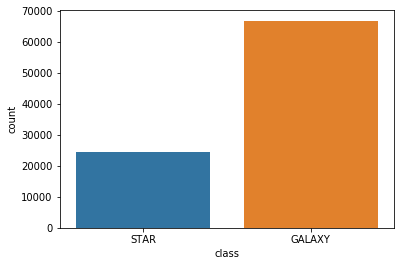

In [6]:
sns.countplot(data['class'])
data['class'].value_counts()

In [7]:
# Normilization of Data
y = data['class'].values
x_dat = data.drop(['class'], axis=1)
x = ((x_dat - np.min(x_dat))/(np.max(x_dat) - np.min(x_dat)))

In [8]:
# Digitization of Y-Values: STAR = 1, GALAXY = 0
i = 0
for d in y:
    if d == 'GALAXY':
        y[i] = 0
    elif d == 'STAR':
        y[i] = 1
        
    i += 1
    
y = y.astype('int')

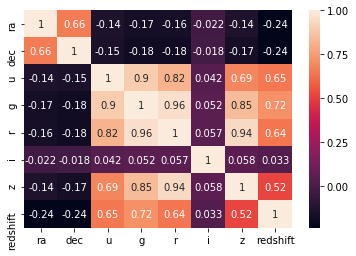

In [9]:
# heatmap
heatmap_data = pd.DataFrame(x)
corr = heatmap_data.corr()
sns.heatmap(corr, annot=True)

In [10]:
# splitting data into train, test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=815)

In [11]:
# Get Synthetic Data
sm = SMOTE(random_state=815, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [12]:
# Linear SVM
lin_svm = LinearSVC()
lin_svm.fit(x_train, y_train)
lin_svm_pred = lin_svm.predict(x_test)

In [13]:
print(accuracy_score(lin_svm_pred, y_test)*100)
print(confusion_matrix(lin_svm_pred, y_test))
print(f1_score(lin_svm_pred, y_test)*100)
print(recall_score(lin_svm_pred, y_test)*100)
print(roc_auc_score(y_test, lin_svm_pred)*100)

98.74660355859409
[[16432     0]
 [  286  6100]]
97.70943456671472
95.52145317882868
99.14463452566096


In [15]:
# Log Reg
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
lr_pred = log_reg.predict(x_test)

print(accuracy_score(lr_pred, y_test)*100)
print(confusion_matrix(lr_pred, y_test))
print(f1_score(lr_pred, y_test)*100)
print(recall_score(lr_pred, y_test)*100)
print(roc_auc_score(y_test, lr_pred)*100)

97.13822420895784
[[16081    16]
 [  637  6084]]
94.90679354184542
90.52224371373308
97.96372026617037


In [16]:
# Log Reg CV - included for sanity checks with LR
log_regcv = LogisticRegressionCV()
log_regcv.fit(x_train, y_train)
lrcv_pred = log_regcv.predict(x_test)

print(accuracy_score(lrcv_pred, y_test)*100)
print(confusion_matrix(lrcv_pred, y_test))
print(f1_score(lrcv_pred, y_test)*100)
print(recall_score(lrcv_pred, y_test)*100)

99.49601192041371
[[16603     0]
 [  115  6100]]
99.06617945594803
98.14963797264681


In [19]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

print(accuracy_score(y_test, gnb_pred)*100)
print(confusion_matrix(gnb_pred, y_test))
print(f1_score(gnb_pred, y_test)*100)
print(recall_score(gnb_pred, y_test)*100)
print(roc_auc_score(y_test, gnb_pred)*100)

98.76413357875361
[[16621   185]
 [   97  5915]]
97.67173051519154
98.38656021290751
98.19350008531102


In [20]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=5, max_features=4)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

print(accuracy_score(y_test, rfc_pred)*100)
print(confusion_matrix(y_test, rfc_pred))
print(f1_score(y_test, rfc_pred)*100)
print(recall_score(y_test, rfc_pred)*100)
print(roc_auc_score(y_test, rfc_pred)*100)

99.76772723288632
[[16670    48]
 [    5  6095]]
99.56709956709956
99.91803278688525
99.81545855159551


In [21]:
# Classification Reports

In [22]:
# SVM
print(classification_report(y_test, lin_svm_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9829    0.9914     16718
           1     0.9552    1.0000    0.9771      6100

   micro avg     0.9875    0.9875    0.9875     22818
   macro avg     0.9776    0.9914    0.9842     22818
weighted avg     0.9880    0.9875    0.9876     22818



In [23]:
# Logistic Regression
print(classification_report(y_test, lr_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9990    0.9619    0.9801     16718
           1     0.9052    0.9974    0.9491      6100

   micro avg     0.9714    0.9714    0.9714     22818
   macro avg     0.9521    0.9796    0.9646     22818
weighted avg     0.9739    0.9714    0.9718     22818



In [24]:
# Sklearn's Logistic Regression CV class
#print(classification_report(y_test, lrcv_pred, digits=4))

In [25]:
# Gaussian Naive Bayes
print(classification_report(y_test, gnb_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9890    0.9942    0.9916     16718
           1     0.9839    0.9697    0.9767      6100

   micro avg     0.9876    0.9876    0.9876     22818
   macro avg     0.9864    0.9819    0.9842     22818
weighted avg     0.9876    0.9876    0.9876     22818



In [26]:
# Random Forest Classification
print(classification_report(y_test, rfc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9971    0.9984     16718
           1     0.9922    0.9992    0.9957      6100

   micro avg     0.9977    0.9977    0.9977     22818
   macro avg     0.9959    0.9982    0.9970     22818
weighted avg     0.9977    0.9977    0.9977     22818



In [27]:
# Cross Validation Tests
def compute_avg(ary):
    return ary.sum()/len(ary)*100

In [28]:
# Random Forest - Score
print(compute_avg(cross_val_score(rfc, x, y, cv=10)))

99.76992592591006


In [29]:
# Gaussian Naive Bayes - Score
print(compute_avg(cross_val_score(gnb, x, y, cv=10)))

95.95825812937025


In [30]:
# SVM - Score
print(compute_avg(cross_val_score(lin_svm, x, y, cv=10)))

98.90436844821393


In [31]:
# Logistic Regression - Score
print(compute_avg(cross_val_score(log_reg, x, y, cv=10)))

98.15277792584331


In [ ]:
# Classification Reports for Cross Validation Results
# Random Forest
rfc_cv_pred = cross_val_predict(rfc, x, y)
print(classification_report(y, rfc_cv_pred, digits=4))

In [ ]:
# Gaussian NB
gnb_cv_pred = cross_val_predict(gnb, x, y)
print(classification_report(y, gnb_cv_pred, digits=4))

In [ ]:
# SVM
svm_cv_pred = cross_val_predict(lin_svm, x, y)
print(classification_report(y, svm_cv_pred, digits=4))

In [ ]:
# Logistic Regression
lr_cv_pred = cross_val_predict(log_reg, x, y)
print(classification_report(y, lr_cv_pred, digits=4))

In [32]:
# Generate Decision Trees
features = ["ra", "dec", "u", "g", "r", "i", "z", "redshift"]
classes = ["GALAXY", "STAR"]

In [34]:
export_graphviz(rfc.estimators_[0], out_file='tree-01.dot', feature_names=features, class_names=classes, rounded=True, proportion=False, precision=2, filled=True)
export_graphviz(rfc.estimators_[1], out_file='tree-02.dot', feature_names=features, class_names=classes, rounded=True, proportion=False, precision=2, filled=True)
export_graphviz(rfc.estimators_[2], out_file='tree-03.dot', feature_names=features, class_names=classes, rounded=True, proportion=False, precision=2, filled=True)
export_graphviz(rfc.estimators_[3], out_file='tree-04.dot', feature_names=features, class_names=classes, rounded=True, proportion=False, precision=2, filled=True)
export_graphviz(rfc.estimators_[4], out_file='tree-05.dot', feature_names=features, class_names=classes, rounded=True, proportion=False, precision=2, filled=True)

In [35]:
from subprocess import call
call(['dot', '-Tpng', 'tree-01.dot', '-o', 'tree01.png'])
call(['dot', '-Tpng', 'tree-02.dot', '-o', 'tree02.png'])
call(['dot', '-Tpng', 'tree-03.dot', '-o', 'tree03.png'])
call(['dot', '-Tpng', 'tree-04.dot', '-o', 'tree04.png'])
call(['dot', '-Tpng', 'tree-05.dot', '-o', 'tree05.png'])

0